In [5]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

### Generating data 

In [6]:
# Generate dummy 2D data for clustering
X, y = make_blobs(n_samples=300,     # Total points
                  centers=4,         # Number of clusters
                  cluster_std=0.60,  # Spread of each cluster
                  random_state=42)   # For reproducibility

In [7]:
data = pd.read_csv("data/winequality-red.csv")

#### Standardization of data
- The reason why we need to do standardization so that the ranges of the data we have are similar and does not make clustering skewed.
- Acidic profiling of wines can be from `1` to `14` and the price can be from $100 to $1000
- Standardizing removes this bias, giving equal weight to each feature.

In [8]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
x_scaled = standard_scalar.fit_transform(X)
X = pd.DataFrame(x_scaled)

#### KMeans clustering
- Creating `k` clusters from the data, the accuracy can be checked by looking at the inertia of the kmeans clusters
- Limitations of the method include not being able to recognize more complicated decision boundaries


In [ ]:
km = KMeans(init="k-means++", n_clusters=9)
km.fit(data)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [39]:
# Get the specific values of the cluster
volatile_acidity = data.values[:,1]
fixed_acidity = data.values[:,0]
residential_sugar = data.values[:,2]

In [10]:
centroids = km.cluster_centers_
labels = km.labels_

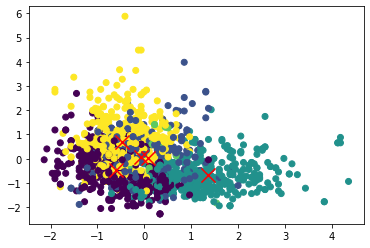

In [12]:
plt.scatter(fixed_acidity, volatile_acidity, c=labels.astype(float), label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')

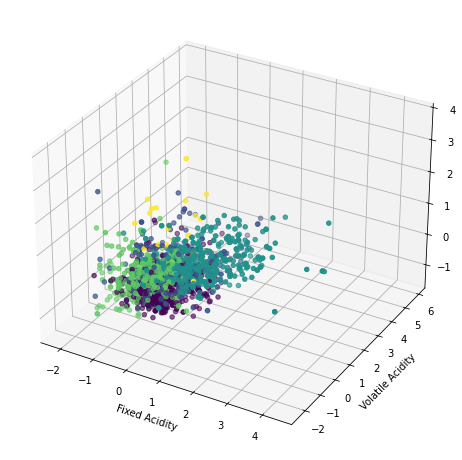

In [ ]:
# Plotting 3D 
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')  
p = ax.scatter(fixed_acidity, volatile_acidity, residential_sugar, c=labels, cmap='viridis')
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(data, km.fit_predict(data))

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.17310417949362888

# Agglomerative Clustering
- Heirarchy based clustering where you make clusters of multiple or a single clusters.
- Example are Agglomerative cluster

In [42]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage="single").fit(data)
clustering.fit(data)


labels = clustering.labels_

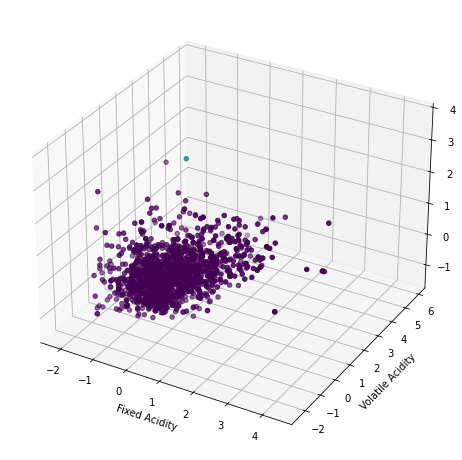

In [43]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')  
p = ax.scatter(fixed_acidity, volatile_acidity, residential_sugar, c=labels, cmap='viridis')
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
plt.show()